#### **This notebook contains the functions used to clean the spectra.**

Import Libraries

In [23]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
import seaborn as sns
import matplotlib.pyplot as plt
from Spectra_Preparation_Functions import *

Read the spectral data

In [24]:
df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")
#df = pd.read_csv("../../data/exosomes.raw_spectrum_400-1800.csv")

In [25]:
df = df[(df['WaveNumber'] >= 400) & (df['WaveNumber'] <= 1800)]

In [26]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
293,201210-1-00,293,400.22778,1765.6628,201210-1,Normal
294,201210-1-00,294,400.91116,1774.7809,201210-1,Normal
295,201210-1-00,295,401.59454,1769.0302,201210-1,Normal
296,201210-1-00,296,402.27789,1756.4220,201210-1,Normal
297,201210-1-00,297,402.96127,1758.8690,201210-1,Normal
...,...,...,...,...,...,...
8023277,210526-3-09,2337,1797.03870,1617.3926,210526-3,Hyperglycemia
8023278,210526-3-09,2338,1797.72200,1633.0911,210526-3,Hyperglycemia
8023279,210526-3-09,2339,1798.40550,1633.3076,210526-3,Hyperglycemia
8023280,210526-3-09,2340,1799.08890,1641.8665,210526-3,Hyperglycemia


#### **Select the chosen cleaning parameters then run the functions**

Choose the Parameters

In [27]:
# # Best Full Spectrum Parameters

# lam = 10 ** 7
# p = 0.05
# window_size = 51
# poly_order = 2

# Best 400-1800 Parameters

# lam = 10 ** 8
# p = 0.01
# window_size = 51
# poly_order = 3

# Standard Parameters
# lam = 10 ** 6
# p = 0.05
# window_size = 11
# poly_order = 2

# More parameters from optuna
# despike_ma = 19
# despike_threshold = 5.75
# lam = 10**10
# p = 0.049

# Clean Params for Pagerank weights
despike_ma = 19
despike_threshold = 5.75
lam = 10**8
p = 0.049
window_size = 11
poly_order = 2

#### **Here is an example on 1 spectrum**

C:\Users\FX 8320\AppData\Local\Temp\ipykernel_10284\2051221034.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline'] = sample.groupby('SpecID')['Absorbance'].transform(lambda x: asls_baseline_correction(x, lam=lam, p=p))
C:\Users\FX 8320\AppData\Local\Temp\ipykernel_10284\2051221034.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']
C:\Users\FX 8320\AppData\Local\Temp\ipykernel_10284\2051221034.py:19: Set

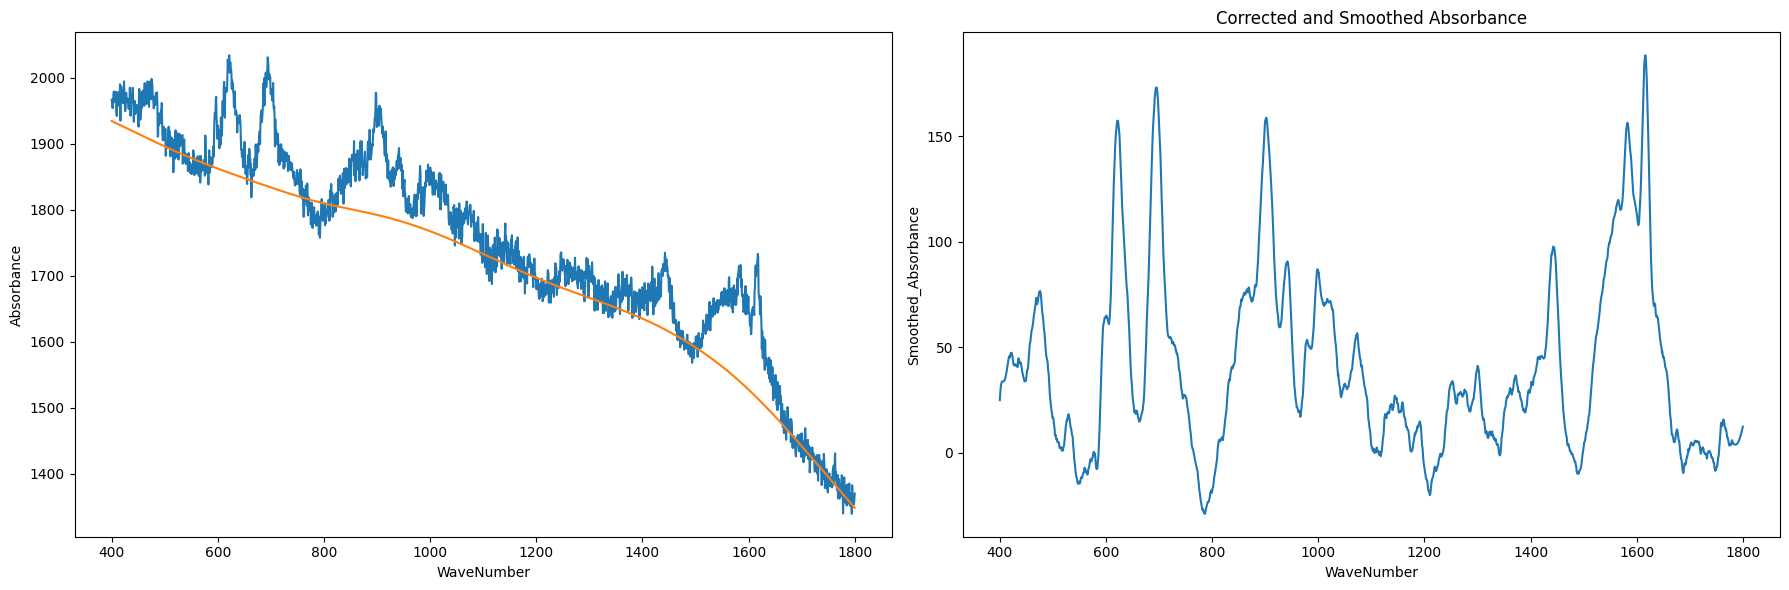

In [70]:
lam = 10**8
p = 0.049
window_size = 51
poly_order = 5

# Selecting the sample from the dataframe based on 'SpecID'
sample = df[df['SpecID'] == "201210-1-01"]

# Creating a figure with 3 subplots in one row
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Adjust the figure size as needed

sample['Baseline'] = sample.groupby('SpecID')['Absorbance'].transform(lambda x: asls_baseline_correction(x, lam=lam, p=p))
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample, ax=axes[0])
sns.lineplot(x="WaveNumber", y="Baseline", data=sample, ax=axes[0])
axes[1].set_title('Absorbance with Baseline')

# Plot 3: Baseline Corrected Absorbance and Smoothed
sample['Baseline_Corrected_Absorbance'] = sample['Absorbance'] - sample['Baseline']
sample['Smoothed_Absorbance'] = sample.groupby('SpecID')['Baseline_Corrected_Absorbance'].transform(lambda x: savgol_filter(x, window_size, poly_order, deriv=0))
sns.lineplot(x="WaveNumber", y="Smoothed_Absorbance", data=sample, ax=axes[1])
axes[1].set_title('Corrected and Smoothed Absorbance')

# Display the plots
plt.tight_layout()  # Adjust the layout to make sure there's no overlap
plt.show()